# Problema de Agrupamento - UCI - Absenteeism_at_work

Esse notebook está usando uma base de dados aberta obtida em https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work.

Originalmente, como será observado, este dataset é para problemas de regressão, porém, criei uma reposta/target/variável dependente para este exercício.

In [1]:
# Instruções basiconas de sempre.

# Lidar com dataframes.
import numpy as np
import pandas as pd

# Lidar com gráficos.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from plotting import (multiple_histograms_plot,
                      bar_plot_with_categorical,
                      plot_confusion_matrix,
                      plot_confusion_matrix_2,
                      plot_roc)

# Lidar com preparação de dados.
from data_prep import data_prep as dp # Eu que fiz esse modulinho ("uuuuuuuuuma bosts!").
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (StandardScaler
                                   , MinMaxScaler)
from sklearn.model_selection import (train_test_split
                                     , cross_val_score
                                     , StratifiedKFold)

# Lidar com validação de modelos.
from sklearn.metrics import (confusion_matrix
                             , accuracy_score
                             , classification_report)

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
nomeDaBase = "../bases/Absenteeism_at_work.csv"
df = pd.read_csv(nomeDaBase, sep=";", encoding="utf-8")

df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


## Cardinalidade
Varificando a cardinalidade dos atributos inteiros. No dataset passado, as variáveis categóricas devem ter passado por um processo de Label Encoder e, portanto, estão como números inteiros. Abaixo, veremos a cardinalidade de cada atributo e analisaremos para ver como tratar cada caso.

In [5]:
df = df.select_dtypes(exclude=["float64"])

matriz_cardialidade = []

for i, coluna in df.items():
    matriz_cardialidade.append([i, len(df[i].unique()), df[i].unique()])
            
matriz_cardialidade = pd.DataFrame(matriz_cardialidade, columns=["Atributo", "Cardinalidade", "Valores"])
matriz_cardialidade.sort_values(by="Cardinalidade", inplace=True, ascending=True)
    
matriz_cardialidade

,Atributo,Cardinalidade,Valores
14,Social smoker,2,"[0, 1]"
13,Social drinker,2,"[1, 0]"
10,Disciplinary failure,2,"[0, 1]"
4,Seasons,4,"[1, 4, 2, 3]"
11,Education,4,"[1, 3, 2, 4]"
3,Day of the week,5,"[3, 4, 5, 6, 2]"
12,Son,5,"[2, 1, 0, 4, 3]"
15,Pet,6,"[1, 0, 4, 2, 5, 8]"
9,Hit target,13,"[97, 92, 93, 95, 99, 96, 94, 98, 81, 88, 100, 87, 91]"
2,Month of absence,13,"[7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 0]"


## Análise preliminar da base e ações:
1. **Existência de campo de identificação:** Remover campos que identifiquem a pessoa, pois queremos um modelo capaz de generalizar.
2. **Incongruências no fator/atribuo/variável independente "Month of absence":** Existem 3 registros "0", o que não é possível.

### Arrumando base:
1. **Existência de campo de identificação:** Remover campos que identifiquem a pessoa, pois queremos um modelo capaz de generalizar.

In [6]:
df_temporario = df.drop(["ID"], axis=1).copy()

2. **Incongruências no fator/atribuo/variável independente "Month of absence":** Existem 3 registros "0", o que não é possível.

In [7]:
seasons_list = sorted(df_temporario["Seasons"].unique())

for season in seasons_list:
    if 0 in (df_temporario[df_temporario["Seasons"] == season]["Month of absence"].unique()):
        print(f"""Estação: {season}""")
        print(f"""{df_temporario[df_temporario["Seasons"] == season]["Month of absence"].value_counts()}""")
        print("-"*50)

Estação: 1
7    67
8    54
9    32
6    16
0    1 
Name: Month of absence, dtype: int64
--------------------------------------------------
Estação: 2
2     72
3     60
1     50
12    9 
0     1 
Name: Month of absence, dtype: int64
--------------------------------------------------
Estação: 3
5    64
4    53
6    38
3    27
0    1 
Name: Month of absence, dtype: int64
--------------------------------------------------


Como tratam-se de poucos registros, vou substituir o 0 de cada "Month of absence" pela categoria de maior frequência dentro de cada estação.

In [8]:
df_temporario.loc[(df_temporario["Seasons"] == 1) & (df_temporario["Month of absence"] == 0), ["Month of absence"]] = 7
df_temporario.loc[(df_temporario["Seasons"] == 2) & (df_temporario["Month of absence"] == 0), ["Month of absence"]] = 2
df_temporario.loc[(df_temporario["Seasons"] == 3) & (df_temporario["Month of absence"] == 0), ["Month of absence"]] = 5

# Criação de novo target
No problema original, a variável resposta/variável dependente/target é "Absenteeism time in hours". Porém, para facilitar a minha vida criei uma regra e, consequentemente, um novo target "Absenteeism". Esse novo target assumi valor 0 (<=2h) ou 1(>2h).

In [9]:
df_temporario["Absenteeism"] = np.where(df_temporario["Absenteeism time in hours"] <= 2, 0, 1)

df_temporario.drop("Absenteeism time in hours", axis=1, inplace=True)

In [10]:
df_temporario.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism
0,26,7,3,1,289,36,13,33,97,0,1,2,1,0,1,90,172,30,1
1,0,7,3,1,118,13,18,50,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,97,0,1,0,1,0,0,89,170,31,0
3,7,7,5,1,279,5,14,39,97,0,1,2,1,1,0,68,168,24,1
4,23,7,5,1,289,36,13,33,97,0,1,2,1,0,1,90,172,30,0


In [11]:
# sns.pairplot(df_para_grafico, kind="scatter", hue="Absenteeism", plot_kws=dict(s=80, edgecolor="white", linewidth=1.0))
# plt.show()

# Feature selection:
Conforme visto na seção 26.01 - Classificação, vimos que o melhor conjunto de fatores/atributos foi dado pela técnica Fischer Score.

**IMPORTANTE:** A técnica Fischer score avalia os fatores/variáveis independentes influenciam na resposta/variável dependente e, portanto, não avalia se há interação entre as variáveis independentes. Ou seja, o conjunto de atributos encontrado é o "melhor" para essa resposta/variável dependente. Se eu mudar a resposta/variável dependente o conjunto pode não ser o mesmo.

Dividindo o dataset em treino e teste:

In [12]:
x = df_temporario.drop("Absenteeism", axis=1)
y = df_temporario.Absenteeism

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## 1. Fischer score

In [13]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import (SelectKBest
                                       , SelectPercentile)

In [14]:
f_score = chi2(x_train.fillna(0), y_train)

pvalues = pd.Series(f_score[1])
pvalues.index = x_train.columns
pvalues.sort_values(ascending=True)

Transportation expense             5.121747e-25
Disciplinary failure               1.731971e-11
Distance from Residence to Work    2.085177e-10
Son                                6.263999e-05
Reason for absence                 5.724123e-03
Social drinker                     3.894660e-02
Age                                1.394800e-01
Month of absence                   3.620260e-01
Weight                             4.292626e-01
Body mass index                    4.410856e-01
Service time                       5.114369e-01
Day of the week                    5.865844e-01
Seasons                            6.450742e-01
Height                             7.401364e-01
Social smoker                      8.171915e-01
Education                          8.176810e-01
Hit target                         9.321219e-01
Pet                                9.800613e-01
dtype: float64

In [15]:
atributos_fisher = list(pvalues[pvalues<1e-02].index)

**Conclusão do uso do Fisher score:** A lista acima indica, de cima para baixo, os fatores com maior importância para a resposta. Eu escolherei trabalhar com as 4 primeiras. 

# Aplicando os modelos de agrupamento
Usaremos duas abordagens:
1. K-Means; e
2. K-Medias.

Para as duas abordagens, é importante que os dados tenham passado por escalonamento.


In [16]:
# Filtrando fatores conforme os atributos escolhidos pelo Fischer score:
    
x_train_filtrado = x_train[atributos_fisher]
x_test_filtrado = x_test[atributos_fisher]

### Escalonando
Existem diversas técnicas de escalonamento. Recomendo muito a leitura do post [Um guia completo para o pré-processamento de dados em machine learning](https://medium.com/@caiquecoelho/um-guia-completo-para-o-pr%C3%A9-processamento-de-dados-em-machine-learning-f860fbadabe1).

<img src="./imagens/escalonamento_simplificado.png" alt="Tabela simplificada de métodos de escalonamento." width="600"/>
<p style="text-align:center">Fonte: <a href="https://medium.com/@caiquecoelho/um-guia-completo-para-o-pr%C3%A9-processamento-de-dados-em-machine-learning-f860fbadabe1">Um guia completo para o pré-processamento de dados em machine learning</a>.</p>

In [17]:
scaler = StandardScaler()

x_train_filtrado = scaler.fit_transform(x_train_filtrado)
x_test_filtrado = scaler.transform(x_test_filtrado);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.



In [18]:
x_train_filtrado = pd.DataFrame(x_train_filtrado, columns=x[atributos_fisher].columns)
x_train_filtrado.describe().T

,count,mean,std,min,25%,50%,75%,max
Reason for absence,518.0,-2.743408e-17,1.000967,-2.323818,-0.759897,0.443119,0.804023,1.044627
Transportation expense,518.0,2.072559e-16,1.000967,-1.579721,-0.656871,0.039048,0.568552,2.505025
Distance from Residence to Work,518.0,2.059699e-16,1.000967,-1.691596,-0.880131,-0.271533,1.351397,1.486641
Disciplinary failure,518.0,-2.933089e-16,1.000967,-0.239046,-0.239046,-0.239046,-0.239046,4.183300
Son,518.0,3.986515e-17,1.000967,-0.911887,-0.911887,0.019785,0.951456,2.814798


Para "enxergarmos", escolherei dois fatores: "Distance from Residence to Work" e "Transportation expense".

## Plotando (só pra ver):

In [19]:
y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index(drop=True)
y_train.head(2)

,Absenteeism
0,1
1,1


In [20]:
df_para_plotar = x_train_filtrado.merge(y_train, how="left", left_index=True, right_index=True);

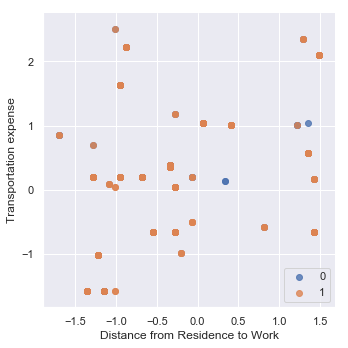

In [21]:
sns.set()

ax = sns.lmplot( x="Distance from Residence to Work"
                , y="Transportation expense"
                , data=df_para_plotar
                , fit_reg=False
                , hue="Absenteeism"
                , legend=False)
 
plt.legend(loc="lower right");

## Calculando a quantidade de centróides 

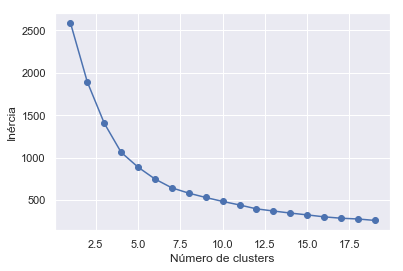

In [22]:
from sklearn.cluster import KMeans

# Quantidade de clusters que serão testados
k = list(range(1, 20))

# Armazena das inércias para cada k
inercia = []

# Roda o K-means para cada k fornecido
for i in k:
    classificador = KMeans(n_clusters=i)
    classificador.fit(x_train_filtrado)
    inercia.append(classificador.inertia_)

# Plota o gráfico com as inércias
plt.plot(k, inercia, '-o')
plt.xlabel(f'Número de clusters')
plt.ylabel('Inércia')
plt.show()

**Conclusão do cálculo de centróides:** Aparentemente, 10 centróides já fazem o trabalho muito bem.

In [73]:
classificador = KMeans(n_clusters=10
                       , random_state=0)

classificador.fit(x_train_filtrado, y_train.values)

# salva os centroides
centroides = classificador.cluster_centers_
# salva as labels dos clusters para cada exemplo
y_kmeans = classificador.predict(x_train_filtrado)

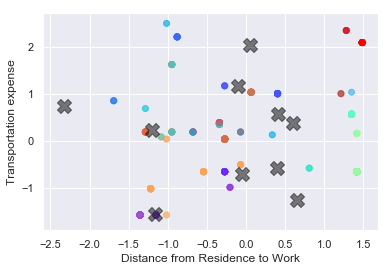

In [76]:
# plota os dados identificando seus clusters
plt.scatter(df_para_plotar["Distance from Residence to Work"]
            , df_para_plotar["Transportation expense"]
            , c = y_kmeans
            , alpha = 0.5
            , cmap = 'rainbow')
plt.xlabel('Distance from Residence to Work')
plt.ylabel('Transportation expense')
# plota os centroides também
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.show()